<a href="https://colab.research.google.com/github/siddharth3444/detect_window/blob/main/Loading_Image_Dat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf ./dataset

In [2]:
!unzip dataset_final.zip -d ./dataset

Archive:  dataset_final.zip
   creating: ./dataset/annotations/
   creating: ./dataset/images/
  inflating: ./dataset/sceneCategories.txt  
   creating: ./dataset/images/testing/
   creating: ./dataset/images/training/
  inflating: ./dataset/images/testing/6.jpg  
  inflating: ./dataset/images/testing/1.jpg  
  inflating: ./dataset/images/training/5.jpg  
  inflating: ./dataset/images/training/10.jpg  
  inflating: ./dataset/images/training/3.jpg  
  inflating: ./dataset/images/training/8.jpg  
  inflating: ./dataset/images/training/4.jpg  
  inflating: ./dataset/images/training/7.jpg  
  inflating: ./dataset/images/training/9.jpg  
  inflating: ./dataset/images/training/2.jpg  
  inflating: ./dataset/images/training/11.jpg  
   creating: ./dataset/annotations/testing/
   creating: ./dataset/annotations/training/
  inflating: ./dataset/annotations/testing/1.png  
  inflating: ./dataset/annotations/testing/6.png  
  inflating: ./dataset/annotations/training/10.png  
  inflating: ./datas

In [3]:
!wget https://raw.githubusercontent.com/CSAILVision/placeschallenge/master/instancesegmentation/instanceInfo100_train.txt

--2024-02-16 07:38:48--  https://raw.githubusercontent.com/CSAILVision/placeschallenge/master/instancesegmentation/instanceInfo100_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3313 (3.2K) [text/plain]
Saving to: ‘instanceInfo100_train.txt.1’

instanceInfo100_tra 100%[===================>]   3.24K  --.-KB/s    in 0s      

2024-02-16 07:38:49 (51.1 MB/s) - ‘instanceInfo100_train.txt.1’ saved [3313/3313]



In [4]:
import pandas as pd

data = pd.read_csv('/content/instanceInfo100_train.txt',
                   sep='\t', header=0, error_bad_lines=False)
data.head(100)

<ipython-input-4-7abfa601991d>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/content/instanceInfo100_train.txt',


,Idx,Object Names,Unnamed: 2,#Inst.,#Pix. per Inst.(*1e3)
0,1,bed,2189,49.06,NaN
1,2,windowpane,8833,10.57,NaN
2,3,cabinet,6727,12.59,NaN
3,4,person,21441,3.47,NaN
4,5,door,4694,11.82,NaN
...,...,...,...,...,...
95,96,bulletin board,282,5.02,NaN
96,97,radiator,199,5.93,NaN
97,98,glass,1487,0.67,NaN
98,99,clock,843,1.25,NaN


In [5]:
id2label = {id: label.strip() for id, label in enumerate(data["Object Names"])}
print(id2label)

{0: 'bed', 1: 'windowpane', 2: 'cabinet', 3: 'person', 4: 'door', 5: 'table', 6: 'curtain', 7: 'chair', 8: 'car', 9: 'painting', 10: 'sofa', 11: 'shelf', 12: 'mirror', 13: 'armchair', 14: 'seat', 15: 'fence', 16: 'desk', 17: 'wardrobe', 18: 'lamp', 19: 'bathtub', 20: 'railing', 21: 'cushion', 22: 'box', 23: 'column', 24: 'signboard', 25: 'chest of drawers', 26: 'counter', 27: 'sink', 28: 'fireplace', 29: 'refrigerator', 30: 'stairs', 31: 'case', 32: 'pool table', 33: 'pillow', 34: 'screen door', 35: 'bookcase', 36: 'coffee table', 37: 'toilet', 38: 'flower', 39: 'book', 40: 'bench', 41: 'countertop', 42: 'stove', 43: 'palm', 44: 'kitchen island', 45: 'computer', 46: 'swivel chair', 47: 'boat', 48: 'arcade machine', 49: 'bus', 50: 'towel', 51: 'light', 52: 'truck', 53: 'chandelier', 54: 'awning', 55: 'streetlight', 56: 'booth', 57: 'television receiver', 58: 'airplane', 59: 'apparel', 60: 'pole', 61: 'bannister', 62: 'ottoman', 63: 'bottle', 64: 'van', 65: 'ship', 66: 'fountain', 67: 'w

In [6]:
#id2label = {  id: label.strip() for id, label in enumerate(data["Object Names"])}
id2label={
    "0": "wall",
    "1": "building",
    "2": "sky",
    "3": "floor",
    "4": "tree",
    "5": "ceiling",
    "6": "road, route",
    "7": "bed",
    "8": "window ",
    "9": "grass",
    "10": "cabinet",
    "11": "sidewalk, pavement",
    "12": "person",
    "13": "earth, ground",
    "14": "door",
    "15": "table",
    "16": "mountain, mount",
    "17": "plant",
    "18": "curtain",
    "19": "chair",
    "20": "car",
    "21": "water",
    "22": "painting, picture",
    "23": "sofa",
    "24": "shelf",
    "25": "house",
    "26": "sea",
    "27": "mirror",
    "28": "rug",
    "29": "field",
    "30": "armchair",
    "31": "seat",
    "32": "fence",
    "33": "desk",
    "34": "rock, stone",
    "35": "wardrobe, closet, press",
    "36": "lamp",
    "37": "tub",
    "38": "rail",
    "39": "cushion",
    "40": "base, pedestal, stand",
    "41": "box",
    "42": "column, pillar",
    "43": "signboard, sign",
    "44": "chest of drawers, chest, bureau, dresser",
    "45": "counter",
    "46": "sand",
    "47": "sink",
    "48": "skyscraper",
    "49": "fireplace",
    "50": "refrigerator, icebox",
    "51": "grandstand, covered stand",
    "52": "path",
    "53": "stairs",
    "54": "runway",
    "55": "case, display case, showcase, vitrine",
    "56": "pool table, billiard table, snooker table",
    "57": "pillow",
    "58": "screen door, screen",
    "59": "stairway, staircase",
    "60": "river",
    "61": "bridge, span",
    "62": "bookcase",
    "63": "blind, screen",
    "64": "coffee table",
    "65": "toilet, can, commode, crapper, pot, potty, stool, throne",
    "66": "flower",
    "67": "book",
    "68": "hill",
    "69": "bench",
    "70": "countertop",
    "71": "stove",
    "72": "palm, palm tree",
    "73": "kitchen island",
    "74": "computer",
    "75": "swivel chair",
    "76": "boat",
    "77": "bar",
    "78": "arcade machine",
    "79": "hovel, hut, hutch, shack, shanty",
    "80": "bus",
    "81": "towel",
    "82": "light",
    "83": "truck",
    "84": "tower",
    "85": "chandelier",
    "86": "awning, sunshade, sunblind",
    "87": "street lamp",
    "88": "booth",
    "89": "tv",
    "90": "plane",
    "91": "dirt track",
    "92": "clothes",
    "93": "pole",
    "94": "land, ground, soil",
    "95": "bannister, banister, balustrade, balusters, handrail",
    "96": "escalator, moving staircase, moving stairway",
    "97": "ottoman, pouf, pouffe, puff, hassock",
    "98": "bottle",
    "99": "buffet, counter, sideboard",
    "100": "poster, posting, placard, notice, bill, card",
    "101": "stage",
    "102": "van",
    "103": "ship",
    "104": "fountain",
    "105": "conveyer belt, conveyor belt, conveyer, conveyor, transporter",
    "106": "canopy",
    "107": "washer, automatic washer, washing machine",
    "108": "plaything, toy",
    "109": "pool",
    "110": "stool",
    "111": "barrel, cask",
    "112": "basket, handbasket",
    "113": "falls",
    "114": "tent",
    "115": "bag",
    "116": "minibike, motorbike",
    "117": "cradle",
    "118": "oven",
    "119": "ball",
    "120": "food, solid food",
    "121": "step, stair",
    "122": "tank, storage tank",
    "123": "trade name",
    "124": "microwave",
    "125": "pot",
    "126": "animal",
    "127": "bicycle",
    "128": "lake",
    "129": "dishwasher",
    "130": "screen",
    "131": "blanket, cover",
    "132": "sculpture",
    "133": "hood, exhaust hood",
    "134": "sconce",
    "135": "vase",
    "136": "traffic light",
    "137": "tray",
    "138": "trash can",
    "139": "fan",
    "140": "pier",
    "141": "crt screen",
    "142": "plate",
    "143": "monitor",
    "144": "bulletin board",
    "145": "shower",
    "146": "radiator",
    "147": "glass, drinking glass",
    "148": "clock",
    "149": "flag"
}

id2label={ int(key):value for key,value in id2label.items() }
id2label

{0: 'wall',
 1: 'building',
 2: 'sky',
 3: 'floor',
 4: 'tree',
 5: 'ceiling',
 6: 'road, route',
 7: 'bed',
 8: 'window ',
 9: 'grass',
 10: 'cabinet',
 11: 'sidewalk, pavement',
 12: 'person',
 13: 'earth, ground',
 14: 'door',
 15: 'table',
 16: 'mountain, mount',
 17: 'plant',
 18: 'curtain',
 19: 'chair',
 20: 'car',
 21: 'water',
 22: 'painting, picture',
 23: 'sofa',
 24: 'shelf',
 25: 'house',
 26: 'sea',
 27: 'mirror',
 28: 'rug',
 29: 'field',
 30: 'armchair',
 31: 'seat',
 32: 'fence',
 33: 'desk',
 34: 'rock, stone',
 35: 'wardrobe, closet, press',
 36: 'lamp',
 37: 'tub',
 38: 'rail',
 39: 'cushion',
 40: 'base, pedestal, stand',
 41: 'box',
 42: 'column, pillar',
 43: 'signboard, sign',
 44: 'chest of drawers, chest, bureau, dresser',
 45: 'counter',
 46: 'sand',
 47: 'sink',
 48: 'skyscraper',
 49: 'fireplace',
 50: 'refrigerator, icebox',
 51: 'grandstand, covered stand',
 52: 'path',
 53: 'stairs',
 54: 'runway',
 55: 'case, display case, showcase, vitrine',
 56: 'pool

In [7]:
import os
import cv2
from PIL import Image

image_data_dir='/content/dataset/images/training'
annotation_data_dir='/content/dataset/annotations/training'

dataset=[]
for item in os.listdir(image_data_dir):
  obj={}
  name=item.split(".")[0]
  obj['image']=Image.open(f"{image_data_dir}/{name}.jpg")
  obj['annotation']=Image.open(f"{annotation_data_dir}/{name}.png")
  dataset.append(obj)

dataset

[{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=994x746>,
  'annotation': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=994x746>},
 {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1038x682>,
  'annotation': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1038x682>},
 {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1424x800>,
  'annotation': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1424x800>},
 {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=736x555>,
  'annotation': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=736x555>},
 {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1000x667>,
  'annotation': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1000x667>},
 {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x445>,
  'annotation': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=600x445>},
 {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=R

In [8]:
index=8
len(dataset)

9

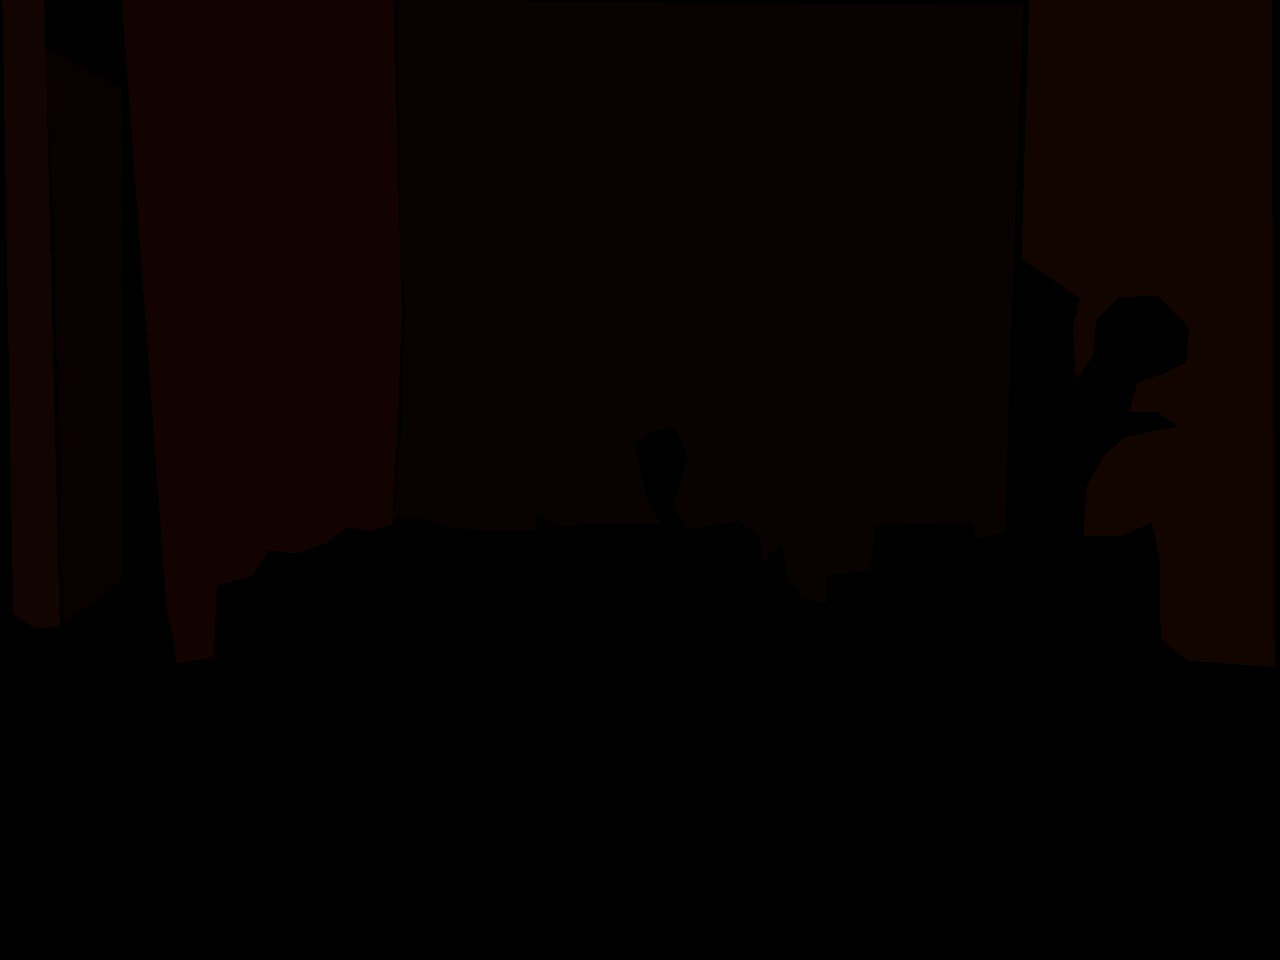

In [9]:
dataset[index]['annotation']

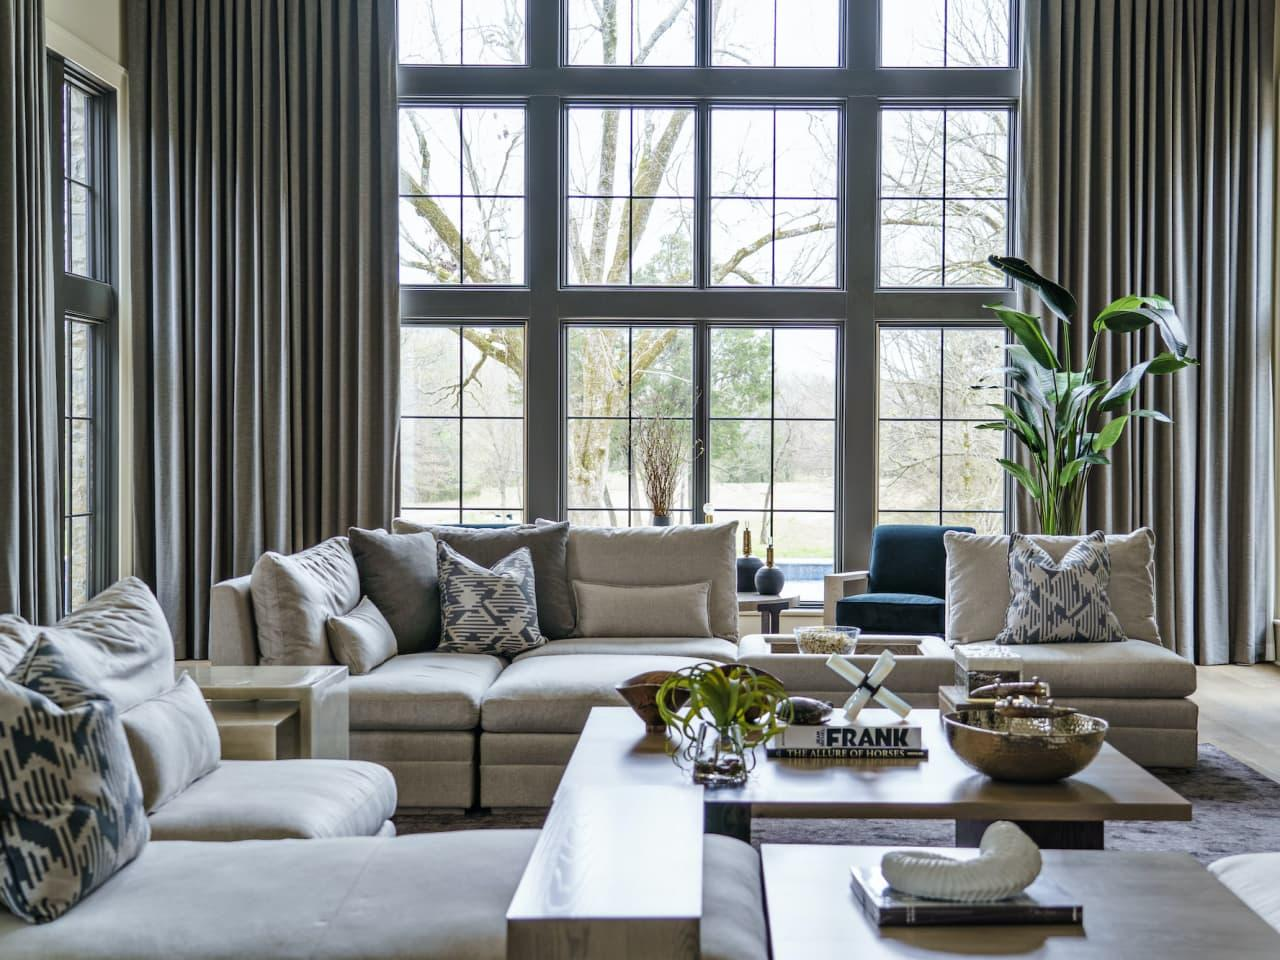

In [10]:
dataset[index]['image']

In [11]:
import numpy as np
index=2
seg = np.array(dataset[index]['annotation'])
# get green channel
instance_seg = seg[:, :, 1]
class_id_map = seg[:, :, 0]

In [12]:
import numpy as np

annotation=np.array(dataset[index]['annotation'])
instance_seg = annotation[:,:,1] # green channel encodes instances
#print(instance_seg)
class_id_map = annotation[:,:,0] # red channel encodes semantic category
print(class_id_map)
class_labels = np.unique(class_id_map)
print(class_labels)

# create mapping between instance IDs and semantic category IDs
inst2class = {}
for label in class_labels:
    instance_ids = np.unique(instance_seg[class_id_map == label])
    inst2class.update({i: label for i in instance_ids})
print(inst2class)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 8 8 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 8]
{0: 0, 1: 8, 2: 8, 3: 8, 4: 8}


Visualizing instance: window 


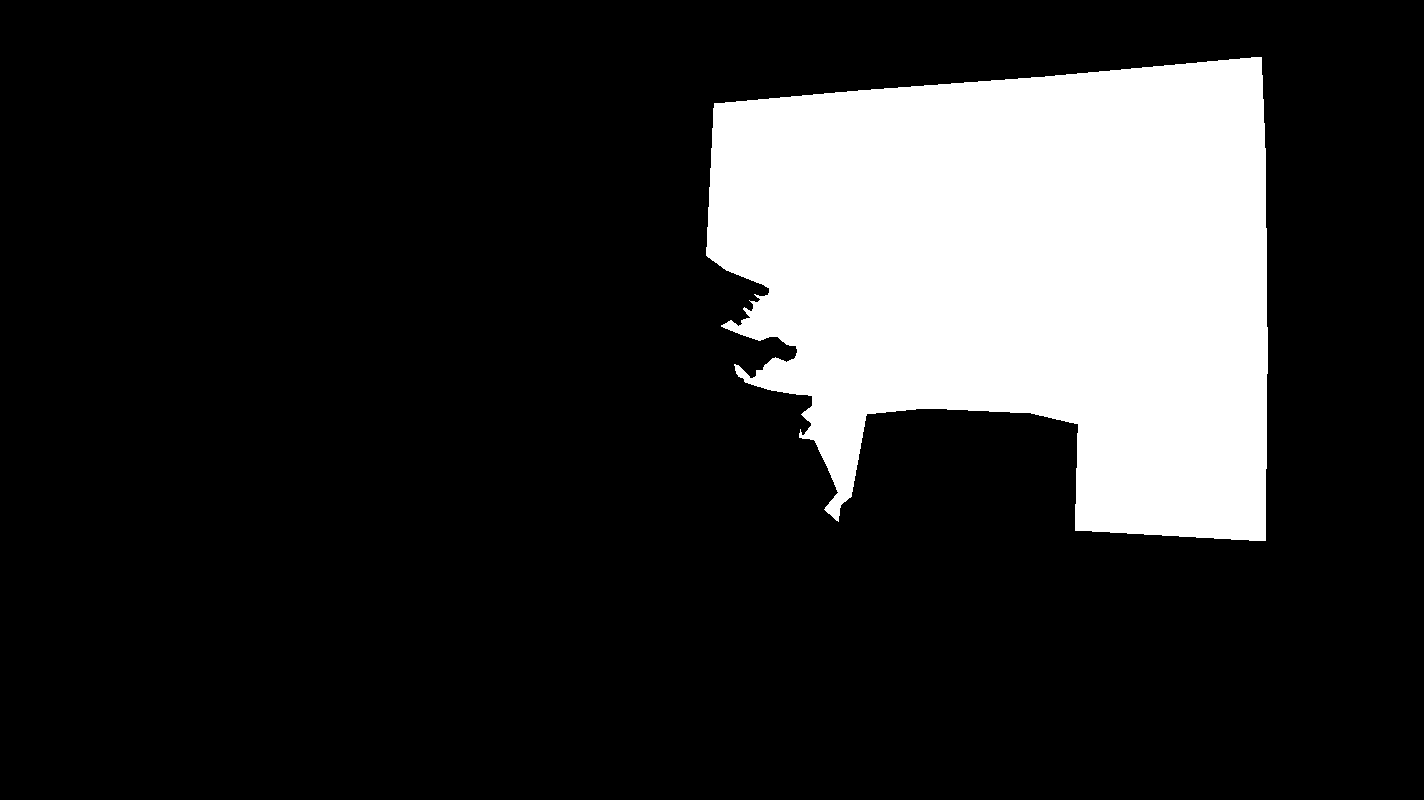

In [13]:
from PIL import Image

print("Visualizing instance:", id2label[inst2class[1]])

# let's visualize the first instance (ignoring background)
mask = (instance_seg == 1)
visual_mask = (mask * 255).astype(np.uint8)
Image.fromarray(visual_mask)

Visualizing instance: window 


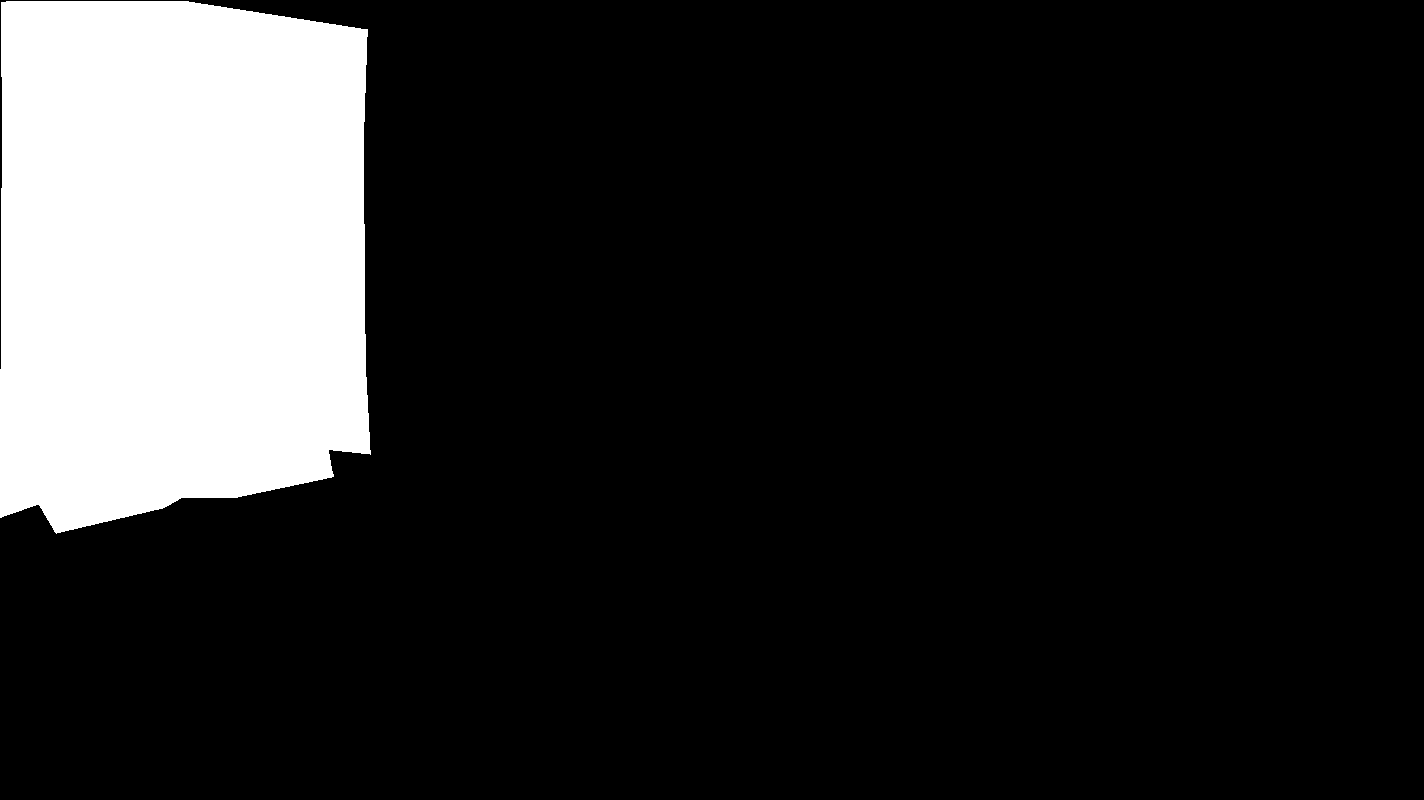

In [14]:
print("Visualizing instance:", id2label[inst2class[2]])

# let's visualize the second instance
mask = (instance_seg == 2)
visual_mask = (mask * 255).astype(np.uint8)
Image.fromarray(visual_mask)

In [15]:
R = seg[:, :, 0]
G = seg[:, :, 1]
masks = (R / 10).astype(np.int32) * 256 + (G.astype(np.int32))

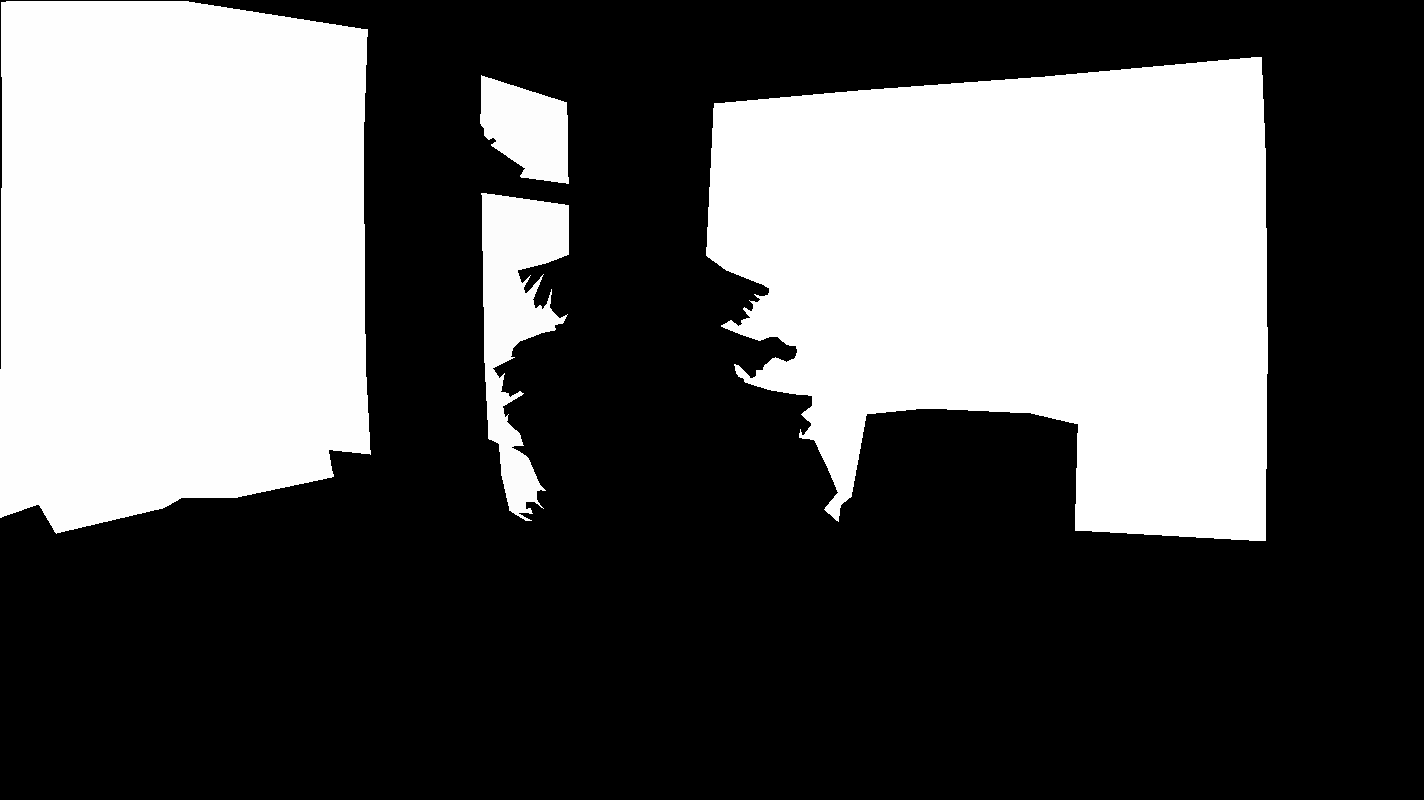

In [16]:
visual_mask = (masks * 255).astype(np.uint8)
Image.fromarray(visual_mask)

In [66]:
from transformers import MaskFormerImageProcessor

processor = MaskFormerImageProcessor(ignore_index=255, do_resize=False, do_rescale=False, do_normalize=False)

In [67]:
import albumentations as A

ADE_MEAN = np.array([123.675, 116.280, 103.530]) / 255
ADE_STD = np.array([58.395, 57.120, 57.375]) / 255

transform = A.Compose([
    A.Resize(width=512, height=512),
    A.Normalize(mean=ADE_MEAN, std=ADE_STD),
])

In [68]:
transformed = transform(image=np.array(dataset[index]['image']), mask=instance_seg)
pixel_values = np.moveaxis(transformed["image"], -1, 0)
instance_seg_transformed = transformed["mask"]
print(pixel_values.shape)
print(instance_seg_transformed.shape)


(3, 512, 512)
(512, 512)


In [69]:
np.unique(instance_seg_transformed)

array([0, 1, 2, 3, 4], dtype=uint8)

In [70]:
inputs = processor([pixel_values], [instance_seg_transformed], instance_id_to_semantic_id=inst2class, return_tensors="pt")

In [71]:
import torch

for k,v in inputs.items():
  if isinstance(v, torch.Tensor):
    print(k,v.shape)
  else:
    print(k,[x.shape for x in v])

pixel_values torch.Size([1, 3, 512, 512])
pixel_mask torch.Size([1, 512, 512])
mask_labels [torch.Size([5, 512, 512])]
class_labels [torch.Size([5])]


In [72]:
inputs["class_labels"]

[tensor([0, 8, 8, 8, 8])]

In [73]:
inputs["class_labels"][0][0].item()

0

Label: wall


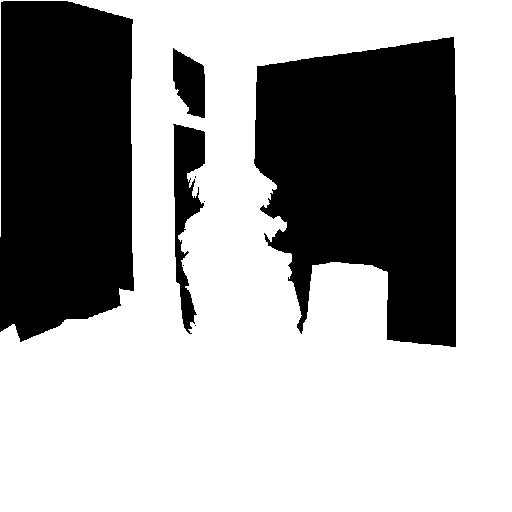

In [74]:
from PIL import Image

# visualize first one
print("Label:", id2label[inputs["class_labels"][0][0].item()])

visual_mask = (inputs["mask_labels"][0][0].numpy() * 255).astype(np.uint8)
Image.fromarray(visual_mask)

Label: window 


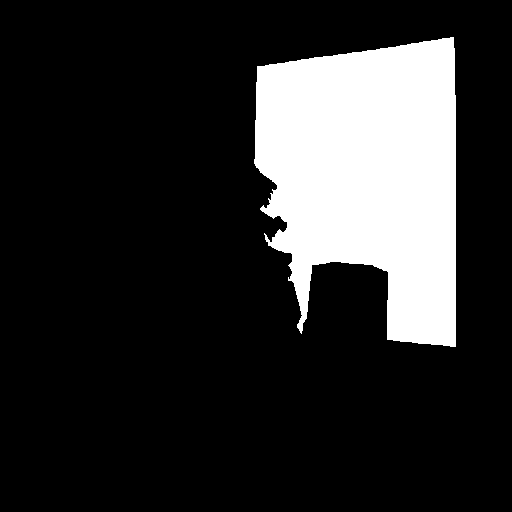

In [75]:
# visualize second one
print("Label:", id2label[inputs["class_labels"][0][1].item()])

visual_mask = (inputs["mask_labels"][0][1].numpy() * 255).astype(np.uint8)
Image.fromarray(visual_mask)

In [76]:
import numpy as np
from torch.utils.data import Dataset

class ImageSegmentationDataset(Dataset):
    """Image segmentation dataset."""

    def __init__(self,dataset,processor, transform=None):
        """
        Args:
            dataset
        """
        self.dataset = dataset
        self.processor = processor
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image = np.array(self.dataset[idx]['image'].convert("RGB"))
        instance_seg = np.array(self.dataset[idx]['annotation'])[:,:,1]
        class_id_map = np.array(self.dataset[idx]['annotation'])[:,:,0]
        class_labels = np.unique(class_id_map)

        inst2class = {}
        for label in class_labels:
            instance_ids = np.unique(instance_seg[class_id_map == label])
            inst2class.update({i: label for i in instance_ids})

        # apply transforms
        if self.transform is not None:
            transformed = self.transform(image=image, mask=instance_seg)
            image, instance_seg = transformed['image'], transformed['mask']
            # convert to C, H, W
            image = image.transpose(2,0,1)

        if class_labels.shape[0] == 1 and class_labels[0] == 0:
            # Some image does not have annotation (all ignored)
            inputs = self.processor([image], return_tensors="pt")
            inputs = {k:v.squeeze() for k,v in inputs.items()}
            inputs["class_labels"] = torch.tensor([0])
            inputs["mask_labels"] = torch.zeros((0, inputs["pixel_values"].shape[-2], inputs["pixel_values"].shape[-1]))
        else:
          inputs = self.processor([image], [instance_seg], instance_id_to_semantic_id=inst2class, return_tensors="pt")
          inputs = {k: v.squeeze() if isinstance(v, torch.Tensor) else v[0] for k,v in inputs.items()}

        return inputs


In [77]:
import albumentations as A

ADE_MEAN = np.array([123.675, 116.280, 103.530]) / 255
ADE_STD = np.array([58.395, 57.120, 57.375]) / 255

# note that you can include more fancy data augmentation methods here
train_transform = A.Compose([
    A.Resize(width=512, height=512),
    A.Normalize(mean=ADE_MEAN, std=ADE_STD),
])

train_dataset = ImageSegmentationDataset(dataset, processor=processor, transform=train_transform)

In [78]:
inputs = train_dataset[4]
for k,v in inputs.items():
  if isinstance(v, torch.Tensor):
    print(k,v.shape)

pixel_values torch.Size([3, 512, 512])
pixel_mask torch.Size([512, 512])
mask_labels torch.Size([4, 512, 512])
class_labels torch.Size([4])


In [79]:
inputs["class_labels"]

tensor([0, 8, 8, 8])

In [80]:
inputs = train_dataset[6]
for k,v in inputs.items():
  print(k,v.shape)

pixel_values torch.Size([3, 512, 512])
pixel_mask torch.Size([512, 512])
mask_labels torch.Size([5, 512, 512])
class_labels torch.Size([5])


In [81]:
inputs["class_labels"]

tensor([ 0, 18, 18,  8,  8])

In [82]:
from torch.utils.data import DataLoader

def collate_fn(batch):
    pixel_values = torch.stack([example["pixel_values"] for example in batch])
    pixel_mask = torch.stack([example["pixel_mask"] for example in batch])
    class_labels = [example["class_labels"] for example in batch]
    mask_labels = [example["mask_labels"] for example in batch]
    return {"pixel_values": pixel_values, "pixel_mask": pixel_mask, "class_labels": class_labels, "mask_labels": mask_labels}

train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=collate_fn)

In [83]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  if isinstance(v, torch.Tensor):
    print(k,v.shape)
  else:
    print(k,len(v))

pixel_values torch.Size([2, 3, 512, 512])
pixel_mask torch.Size([2, 512, 512])
class_labels 2
mask_labels 2


In [84]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  if isinstance(v, torch.Tensor):
    print(k,v.shape)
  else:
    print(k,len(v))

pixel_values torch.Size([2, 3, 512, 512])
pixel_mask torch.Size([2, 512, 512])
class_labels 2
mask_labels 2


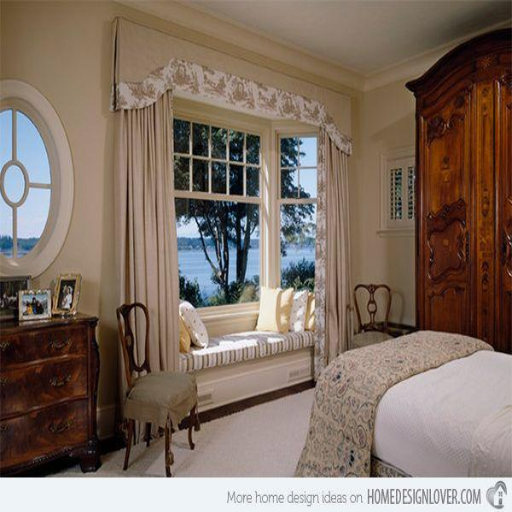

In [85]:
from PIL import Image

ADE_MEAN = np.array([123.675, 116.280, 103.530]) / 255
ADE_STD = np.array([58.395, 57.120, 57.375]) / 255

batch_index = 0

unnormalized_image = (batch["pixel_values"][batch_index].numpy() * np.array(ADE_STD)[:, None, None]) + np.array(ADE_MEAN)[:, None, None]
unnormalized_image = (unnormalized_image * 255).astype(np.uint8)
unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
Image.fromarray(unnormalized_image)

In [86]:
batch["class_labels"][batch_index]

tensor([ 0,  8,  8, 18, 18])

In [87]:
id2label[7]

'bed'

In [88]:
batch["mask_labels"][batch_index].shape

torch.Size([5, 512, 512])

Visualizing mask for: wall


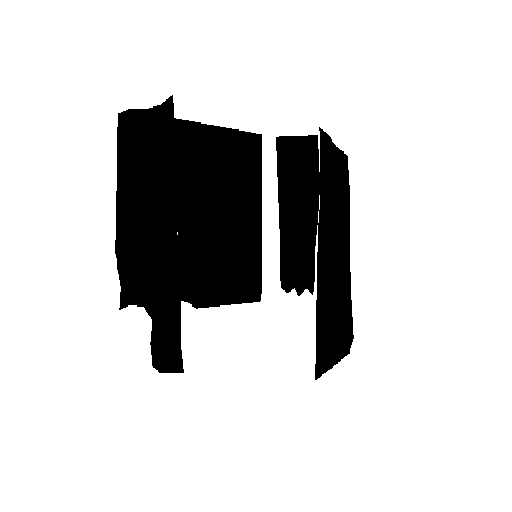

In [89]:
print("Visualizing mask for:", id2label[batch["class_labels"][batch_index][0].item()])

visual_mask = (batch["mask_labels"][batch_index][0].bool().numpy() * 255).astype(np.uint8)
Image.fromarray(visual_mask)

Visualizing mask for: window 


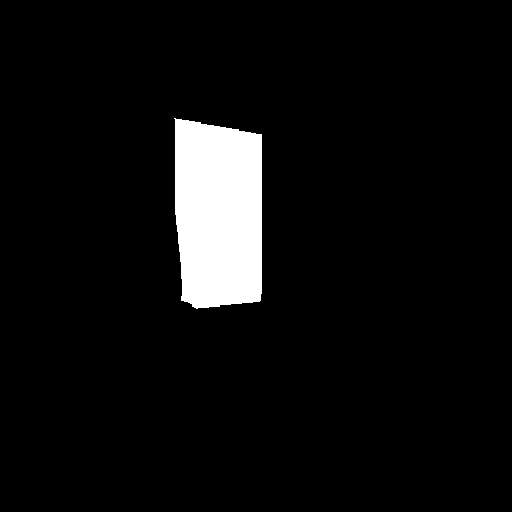

In [90]:
print("Visualizing mask for:", id2label[batch["class_labels"][batch_index][1].item()])

visual_mask = (batch["mask_labels"][batch_index][1].bool().numpy() * 255).astype(np.uint8)
Image.fromarray(visual_mask)

In [91]:
len(batch['mask_labels'])

2

In [92]:
from transformers import MaskFormerForInstanceSegmentation

# Replace the head of the pre-trained model
# We specify ignore_mismatched_sizes=True to replace the already fine-tuned classification head by a new one
model = MaskFormerForInstanceSegmentation.from_pretrained("facebook/maskformer-swin-base-ade",
                                                          id2label=id2label,
                                                          ignore_mismatched_sizes=True)

In [44]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  if isinstance(v, torch.Tensor):
    print(k,v.shape)
  else:
    print(k,len(v))

pixel_values torch.Size([2, 3, 512, 512])
pixel_mask torch.Size([2, 512, 512])
class_labels 2
mask_labels 2


In [93]:
print([label.shape for label in batch["class_labels"]])
print(batch["class_labels"])

[torch.Size([5]), torch.Size([3])]
[tensor([ 0,  8,  8, 18, 18]), tensor([0, 8, 8])]


In [94]:
print([label.shape for label in batch["mask_labels"]])

[torch.Size([5, 512, 512]), torch.Size([3, 512, 512])]


In [47]:
# outputs = model(
#           pixel_values=batch["pixel_values"],
#           mask_labels=batch["mask_labels"],
#           class_labels=batch["class_labels"],
#       )
# outputs.loss

tensor([6.3201], grad_fn=<AddBackward0>)

In [ ]:
import torch
from tqdm.auto import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)

running_loss = 0.0
num_samples = 0
for epoch in range(100):
  print("Epoch:", epoch)
  model.train()
  for idx, batch in enumerate(tqdm(train_dataloader)):
      # Reset the parameter gradients
      optimizer.zero_grad()
      # Forward pass
      #print("===========Training============")
      outputs = model(
              pixel_values=batch["pixel_values"].to(device),
              mask_labels=[labels.to(device) for labels in batch["mask_labels"]],
              class_labels=[labels.to(device) for labels in batch["class_labels"]],
      )
      # Backward propagation
      loss = outputs.loss
      loss.backward()
      #print("==============================================")
      batch_size = batch["pixel_values"].size(0)
      running_loss += loss.item()
      num_samples += batch_size

      if idx % 100 == 0:
        print("Loss:", running_loss/num_samples)

      # Optimization
      optimizer.step()

Epoch: 0


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.2857569754123688
Epoch: 1


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.3552606999874115
Epoch: 2


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.3741814211010933
Epoch: 3


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.36260272819420386
Epoch: 4


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.3612118120256223
Epoch: 5


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.3672866612038714
Epoch: 6


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.3448634544121368
Epoch: 7


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.33619171587320473
Epoch: 8


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.3281120474676828
Epoch: 9


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.32433269253696306
Epoch: 10


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.3095203663991845
Epoch: 11


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.3039395496396735
Epoch: 12


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.30589988908984445
Epoch: 13


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.3015853955465205
Epoch: 14


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.3066906735766679
Epoch: 15


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.30644720879784465
Epoch: 16


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.30237935013967016
Epoch: 17


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.3022973066376102
Epoch: 18


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.29892539014903513
Epoch: 19


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.2938406199561378
Epoch: 20


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.289349156830992
Epoch: 21


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.28623669434592364
Epoch: 22


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.28219232127070426
Epoch: 23


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.2764907748077475
Epoch: 24


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.27052201207624665
Epoch: 25


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.26530495775034774
Epoch: 26


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.2616409043134269
Epoch: 27


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.2585360814722217
Epoch: 28


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.25331576123071
Epoch: 29


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.24818958400150215
Epoch: 30


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.24460741481743753
Epoch: 31


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.24172513026518755
Epoch: 32


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.23753851332284254
Epoch: 33


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.23533392556784144
Epoch: 34


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.2320480722474394
Epoch: 35


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.2285231330581832
Epoch: 36


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.2249097729136059
Epoch: 37


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.2224560328717552
Epoch: 38


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.21820855081124707
Epoch: 39


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.21522889236679496
Epoch: 40


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.21316524293500086
Epoch: 41


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.21040117536794464
Epoch: 42


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.20799243966803738
Epoch: 43


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.20568593820331948
Epoch: 44


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.20362807154168736
Epoch: 45


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.20103494928239019
Epoch: 46


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.19840163236949593
Epoch: 47


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.19556383288081955
Epoch: 48


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.19314993620090495
Epoch: 49


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.19053702467619432
Epoch: 50


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.18805066887618957
Epoch: 51


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.18633525329692505
Epoch: 52


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.18409355278820433
Epoch: 53


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.18245767133936502
Epoch: 54


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.18003236654321433
Epoch: 55


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.178290318982522
Epoch: 56


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.17605097567581612
Epoch: 57


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.17419993034699588
Epoch: 58


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.17211636229780794
Epoch: 59


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.17011720720699536
Epoch: 60


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.1680528742305907
Epoch: 61


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.16629335382943145
Epoch: 62


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.16457842846534082
Epoch: 63


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.1629497103969221
Epoch: 64


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.16147912875668607
Epoch: 65


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.15991633392400798
Epoch: 66


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.15827444669534296
Epoch: 67


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.15698728552165112
Epoch: 68


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.15535176641244064
Epoch: 69


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.15403900918570224
Epoch: 70


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.15275664858614343
Epoch: 71


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.1512545378248145
Epoch: 72


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.1498931572185113
Epoch: 73


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.14850970960260343
Epoch: 74


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.14718456888671763
Epoch: 75


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.14590658851661217
Epoch: 76


  0%|          | 0/5 [00:00<?, ?it/s]

Loss: 0.1450348826771488
Epoch: 77


  0%|          | 0/5 [00:00<?, ?it/s]

In [49]:
import gc
torch.cuda.empty_cache()
gc.collect()

1449

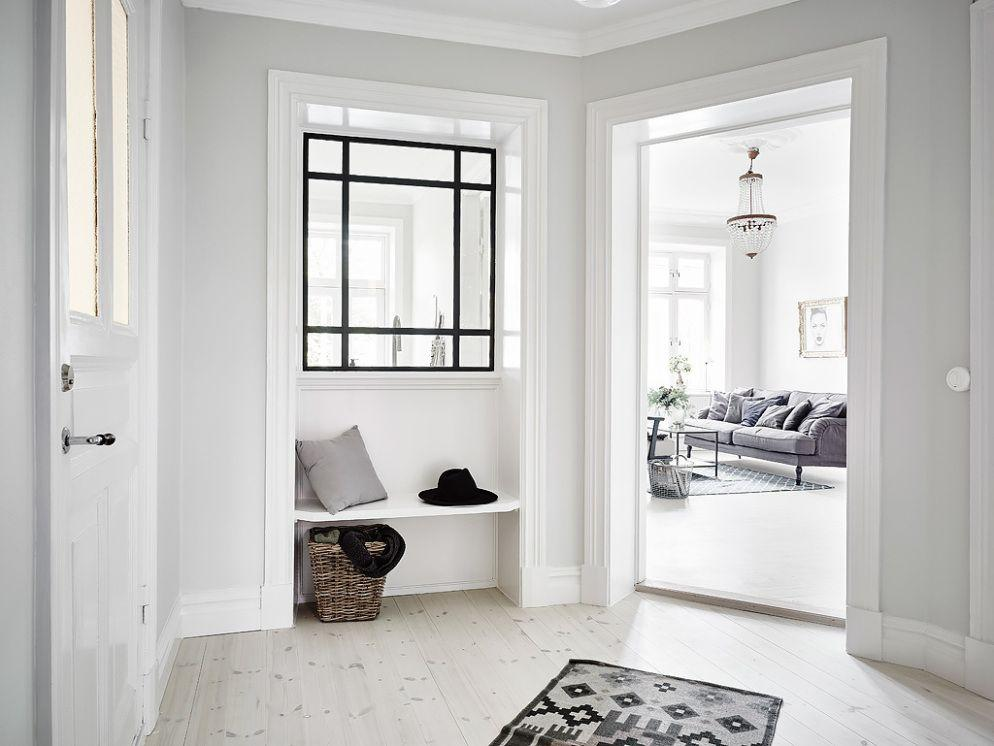

In [96]:
idx = 0

image = dataset[idx]["image"]
image

In [97]:
from transformers import MaskFormerImageProcessor

processor = MaskFormerImageProcessor()

In [98]:
inputs = processor(image, return_tensors="pt").to(device)
for k,v in inputs.items():
  print(k,v.shape)

pixel_values torch.Size([1, 3, 800, 1088])
pixel_mask torch.Size([1, 800, 1088])


In [99]:
import torch

# forward pass
with torch.no_grad():
  outputs = model(**inputs)

In [100]:
results = processor.post_process_instance_segmentation(outputs, target_sizes=[image.size[::-1]])[0]
print(results.keys())

dict_keys(['segmentation', 'segments_info'])


In [101]:
for segment in results['segments_info']:
  print(segment)

{'id': 0, 'label_id': 8, 'was_fused': False, 'score': 0.534017}
{'id': 1, 'label_id': 0, 'was_fused': False, 'score': 0.92681}


In [102]:
import numpy as np

def get_mask(segmentation, segment_id):
  mask = (segmentation.cpu().numpy() == segment_id)
  visual_mask = (mask * 255).astype(np.uint8)
  visual_mask = Image.fromarray(visual_mask)

  return visual_mask

Visualizing mask for instance: window 


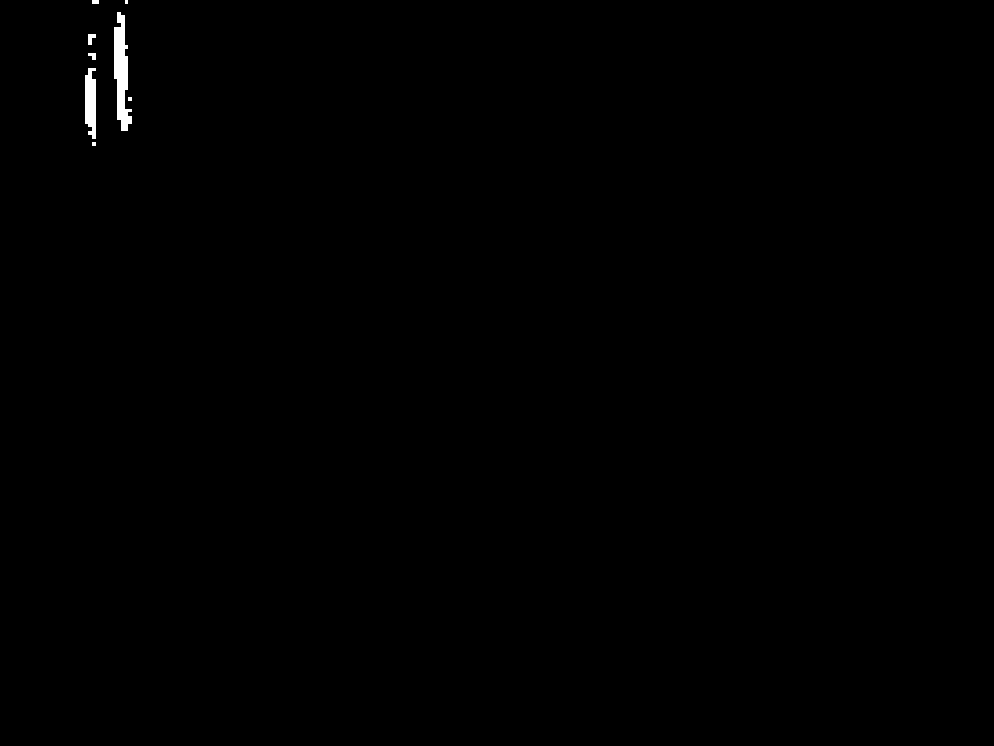

------
Visualizing mask for instance: wall


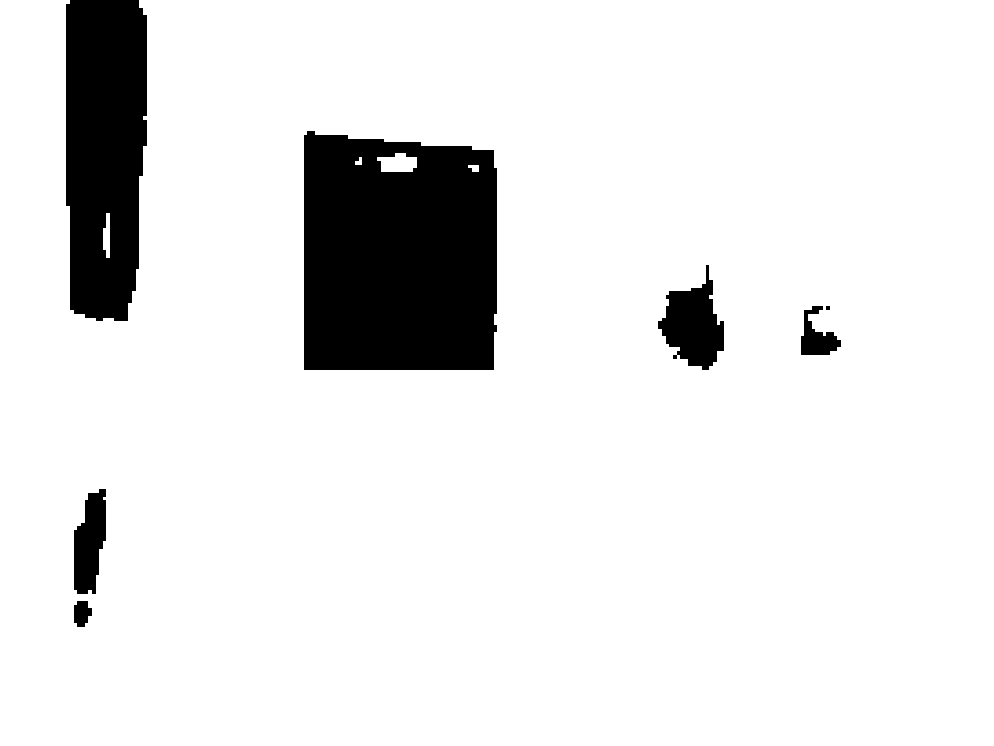

------


In [103]:
for segment in results['segments_info']:
    print("Visualizing mask for instance:", model.config.id2label[segment['label_id']])
    mask = get_mask(results['segmentation'], segment['id'])
    display(mask)
    print("------")